<a href="https://colab.research.google.com/github/Desmyk/CapstoneProject/blob/main/BlueberryRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check the dataset shape
print("Training dataset shape:", train_df.shape)
print("Testing dataset shape:", test_df.shape)

Training dataset shape: (15289, 18)
Testing dataset shape: (10194, 17)


In [5]:
# check training data

train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
# check testing data

test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [7]:
# Explore the training dataset

print("Training dataset columns:", train_df.columns)
print("Training dataset info:")
print(train_df.info())
print("Training dataset description:")
print(train_df.describe())


Training dataset columns: Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')
Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8  

<Figure size 800x600 with 0 Axes>

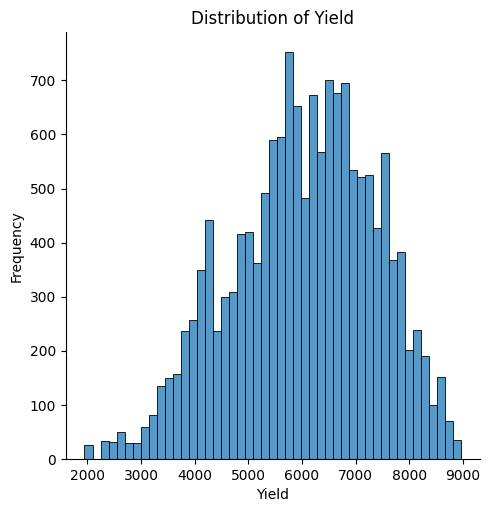

In [8]:
# Visualize the distribution of the target variable (Yield)

plt.figure(figsize=(8, 6))
sns.displot(train_df['yield'])
plt.title("Distribution of Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Data Preprocessing
# Drop any rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [18]:
# Prepare the data
X = train_df.drop(['yield'], axis=1)
y = train_df['yield']


In [26]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

In [29]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Create and train a ridge regression model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Create and train a lasso regression model
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

# Create and train a random forest regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = model_lr.predict(X_val)
y_pred_ridge = model_ridge.predict(X_val)
y_pred_lasso = model_lasso.predict(X_val)
y_pred_rf = model_rf.predict(X_val)

# Evaluate the models using Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
mae_rf = mean_absolute_error(y_val, y_pred_rf)

print(f'MAE (Linear Regression): {mae_lr:.2f}')
print(f'MAE (Ridge Regression): {mae_ridge:.2f}')
print(f'MAE (Lasso Regression): {mae_lasso:.2f}')
print(f'MAE (Random Forest Regressor): {mae_rf:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.740e+08, tolerance: 2.195e+06
  model = cd_fast.enet_coordinate_descent(


MAE (Linear Regression): 370.43
MAE (Ridge Regression): 370.73
MAE (Lasso Regression): 370.70
MAE (Random Forest Regressor): 359.66


In [30]:
# Make predictions on the test set using the best model
best_model = model_rf
test_pred = best_model.predict(test_scaled)

In [31]:
# Save the predictions to a submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'yield': test_pred})
submission_df.to_csv('submission.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-1-3ec439ea4340>, line 1)